# 奥克兰犯罪统计数据集
## 1. 数据集加载

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

path = r"D:\Code\Python\data_mining_course\作业一_数据探索性分析与数据预处理\dataset\oakland_crime_statistics\records-for-{}.csv"
data = pd.concat([pd.read_csv(path.format(year)) for year in [2011,2013,2015,2016]])
data2 = pd.concat([pd.read_csv(path.format(year)) for year in [2012,2014]])
data2['Location 1'] = data2['Location 1'].astype(str)
data2['Location'] = ''
for index,row in data2.iterrows():
    l = row['Location 1'].split("address")
    if len(l)>2:
        l = l[2].split("city")[0].replace('"','').replace(":","").replace(",","")
    else:
        l = None
    row['Location'] = l

TypeError: drop() got an unexpected keyword argument 'coloumn'

In [1]:
data2 = data2.drop(columns=["Location 1"])
print('处理完成')
data = pd.concat([data,data2],ignore_index=True)
data.info()
#data.head(5)
#data2.info()

NameError: name 'data2' is not defined

## 2. 数据集可视化可摘要
### 2.1 数据摘要和可视化
- 共13个属性,其中：
- 标称属性:
    1. Agency 办事处
    2. Location 事发区域
    3. Area Id 区域ID
    4. Beat  击败
    5. Priority 优先级
    6. Incident Type Id 事件类型ID
    7. Incident Type Description 事件类型描述
    8. Event Number 事件代码
    9. Zip Codes 邮政编码
- 数值属性：
    10. Create Time 发生时间
    11. Closed Time 结束时间

(1) Agency属性

OP     1046384
NaN          4
Name: Agency, dtype: int64


<AxesSubplot:>

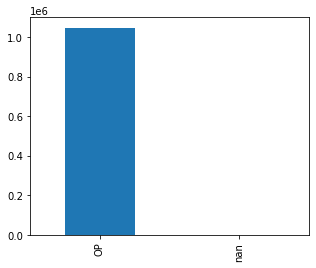

In [47]:
print(data['Agency'].value_counts(dropna = False).head(10))
data['Agency'].value_counts(dropna = False).plot(kind="bar",figsize=(5,4))

(2) Location属性

NaN                           374911
 INTERNATIONAL BLVD             9498
 AV&INTERNATIONAL BLVD          8340
 MACARTHUR BLVD                 7920
 BROADWAY                       5915
 FOOTHILL BLVD                  4455
 7TH ST                         4038
 TELEGRAPH AV                   3940
 INTERNATIONAL BLVD             3866
 AV&MACARTHUR BLVD              3305
Name: Location, dtype: int64


<AxesSubplot:>

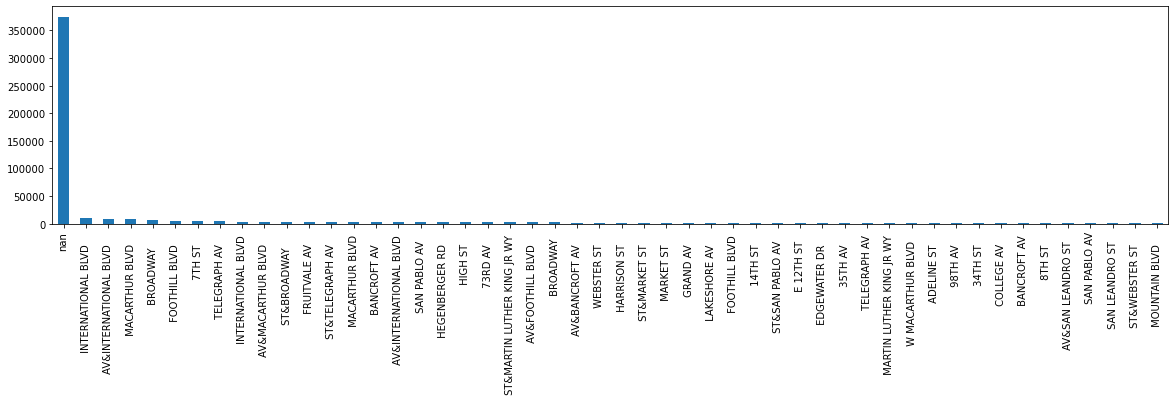

In [48]:
print(data['Location'].value_counts(dropna = False).head(10))
data['Location'].value_counts(dropna = False)[:50].plot(kind="bar",figsize=(20,4))

(3) Area Id属性

1.0    290452
2.0    236700
NaN    182365
P3     129054
P1     114560
P2      53033
3.0     32907
POU      5960
PCW       789
5.0       320
Name: Area Id, dtype: int64


<AxesSubplot:>

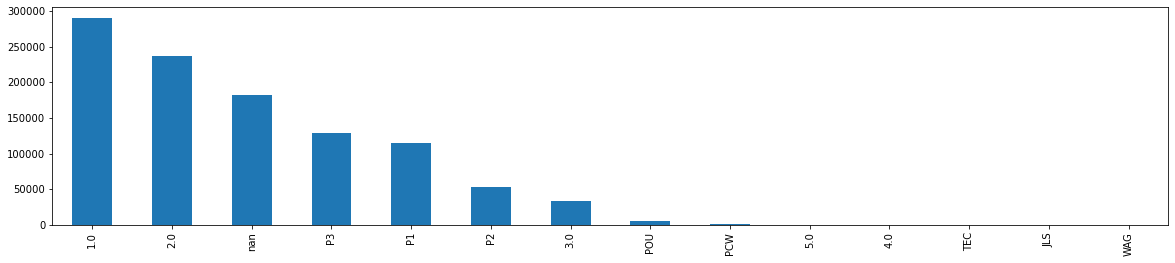

In [49]:
print(data['Area Id'].value_counts(dropna = False).head(10))
data['Area Id'].value_counts(dropna = False).plot(kind="bar",figsize=(20,4))

(4) Beat属性

04X    43626
08X    38097
30Y    30880
26Y    30377
30X    29881
23X    29684
19X    29633
34X    27591
06X    27148
03X    25587
Name: Beat, dtype: int64


<AxesSubplot:>

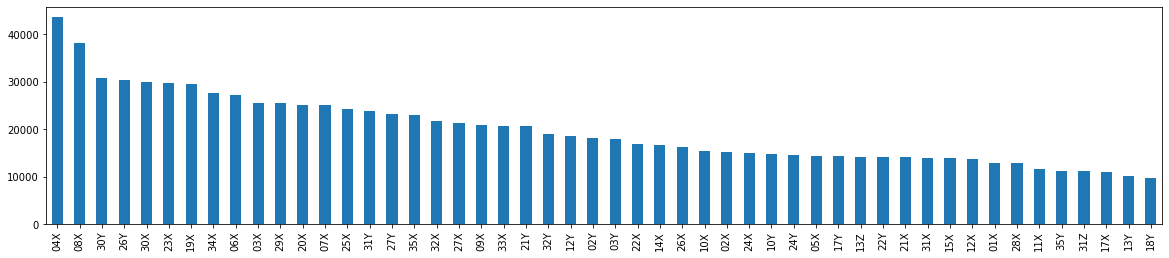

In [51]:
print(data['Beat'].value_counts(dropna = False).head(10))
data['Beat'].value_counts(dropna = False)[:50].plot(kind="bar",figsize=(20,4))

(5) Priority属性

2.0    814818
1.0    231542
0.0        24
NaN         4
Name: Priority, dtype: int64


<AxesSubplot:>

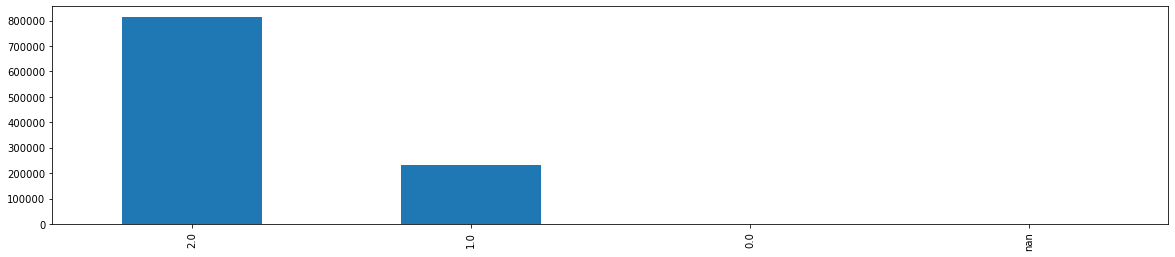

In [52]:
print(data['Priority'].value_counts(dropna = False).head(10))
data['Priority'].value_counts(dropna = False).plot(kind="bar",figsize=(20,4))

(6) Incident Type Id属性

933R     98497
SECCK    70965
415      66720
911H     54935
10851    47958
5150     37218
415C     33470
242      30636
912      26984
243E     23964
Name: Incident Type Id, dtype: int64


<AxesSubplot:>

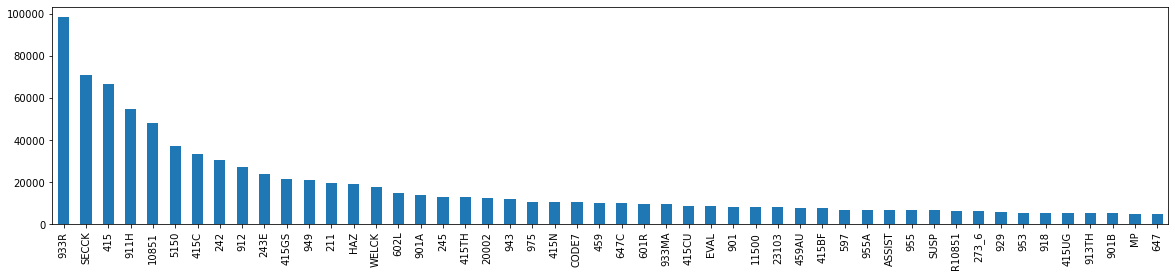

In [53]:
print(data['Incident Type Id'].value_counts(dropna = False).head(10))
data['Incident Type Id'].value_counts(dropna = False)[:50].plot(kind="bar",figsize=(20,4))

(7) Incident Type Description属性

ALARM-RINGER            98497
SECURITY CHECK          70965
911 HANG-UP             54935
STOLEN VEHICLE          47958
DISTURBING THE PEACE    38257
MENTALLY ILL            37218
415 UNKNOWN             33470
BATTERY                 30636
SUSPICIOUS PERSON       26984
BATTERY ON CO-HABITA    23964
Name: Incident Type Description, dtype: int64


<AxesSubplot:>

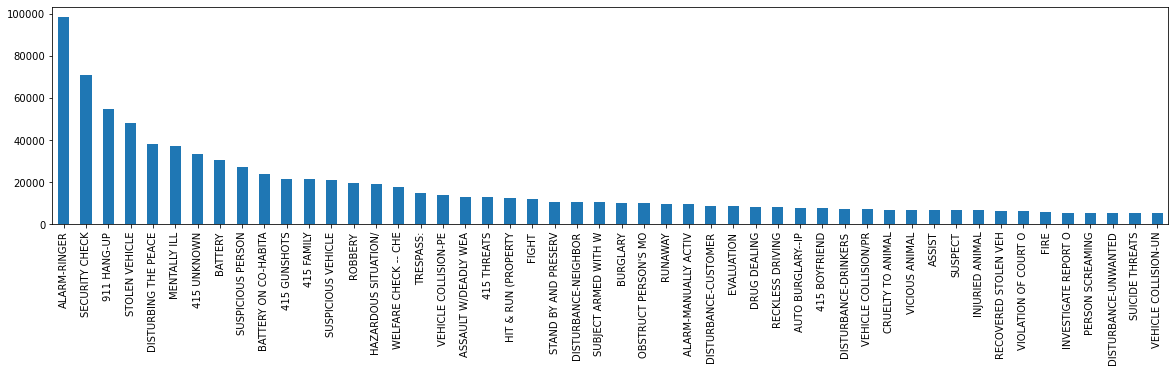

In [54]:
print(data['Incident Type Description'].value_counts(dropna = False).head(10))
data['Incident Type Description'].value_counts(dropna = False)[:50].plot(kind="bar",figsize=(20,4))

(8) Event Number属性

In [ ]:
print(data['Event Number'].value_counts(dropna = False).head(10))
data['Event Number'].value_counts(dropna = False)[:50].plot(kind="bar",figsize=(20,4))

(9) Zip Codes属性

In [ ]:
print(data['Zip Codes'].value_counts(dropna = False).head(10))
data['Zip Codes'].value_counts(dropna = False).plot(kind="bar",figsize=(20,4))

## 3. 数据缺失的处理
统计所有属性的数据缺失情况：

In [ ]:
print(data.isnull().sum(axis=0))

### 3.1 处理Area Id属性缺失
缺失原因：统计失误，将缺失部分剔除

In [ ]:
data_beat = data.dropna(subset=['Area Id'])
plt.subplot(2,1,1) 
data["Area Id"].value_counts(dropna = False)[:50].plot(kind='bar',figsize=(20,8))
plt.subplot(2,1,2) 
data_beat["Area Id"].value_counts(dropna = False)[:50].plot(kind='bar',figsize=(20,8))

### 3.2 处理Beat属性缺失
缺失原因：统计失误，将缺失部分剔除

In [ ]:
data_beat = data.dropna(subset=['Beat'])
plt.subplot(2,1,1) 
data["Beat"].value_counts(dropna = False)[:50].plot(kind='bar',figsize=(20,8))
plt.subplot(2,1,2) 
data_beat["Beat"].value_counts(dropna = False)[:50].plot(kind='bar',figsize=(20,8))